# Домашнє завдання №9. Підбір гіперпараметрів

## Cтворення нейронної мережі за допомогою механізмів Keras, яка буде класифікувати товари із датасету fashion_mnist з точністю не менше 91%

### 1. Завантаження і підготовка даних

In [31]:
from tensorflow import keras


In [32]:
from keras.datasets import fashion_mnist
# датасет із зображеннями одягу та взуття, містить 60 000 тренувальних зображень і 10 000 тестових зображень розміром 28x28 пікселів, представляючи одяг у 10 різних класах

from keras.models import Sequential  # клас, який дозволяє створювати моделі шар за шаром

from keras.layers import Dense  # клас, який створює повнозв'язкові шари

from keras import utils  # утиліти для переведення даних в підходячий для keras формат

In [33]:
# Розпакування даних з load_data на тренувальні та тестові дані, а також відповідні мітки (labels)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [34]:
# Проаналізуємо форму тренувальних даних
print(x_train[0].shape)

(28, 28)


In [35]:
# Оскільки повнозв'язкова нейромережа не може працювати з двовимірним масивом,
# його необхідно переформатувати в одновимірний вектор

import numpy as np
# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

In [36]:
x_train.shape

(60000, 784)

В датасеті fashion_mnist правильні відповіді містять номер класу зображення. Нейромережа видаватиме 10 значень (по кількості вихідних нейронів) з вирогідностями приналежності одягу до певного класу. Тому нам необхідно перетворити представлення правильних відповідей з номерів класів (від 0 до 9) у one-hot-encoding формат.

In [37]:
# Перетворимо мітки в категорії (one-hot-encoding)
y_train = utils.to_categorical(y_train, num_classes=10)

In [38]:
y_train.shape

(60000, 10)

### 2. Підбір гіперпараметрів для різних архітектур нейромережі

#### Модель №1. Базова архітектура

В якості першого варіанту побудуємо повнозв'язкову (всі нейрони одного шару пов'язані зі всіма нейронами наступного шуру) нейромережу з двох шарів:
- вхідний шар з 50 нейронів;
- вихідний шар з 10 нейронів.

Кількість нейронів на вхідному шарі можна міняти, але кількість нейронів виходного шару має дорівнювати кількості міток.

Кожний вихідний нейрон видаватиме вирогідність (від 0 до 1) конкретного предмету одягу.

In [39]:
# створюємо послідовну модель
model1 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model1.add(Dense(50, input_dim=784, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model1.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model1.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [40]:
# виведемо параметри моделі
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                39250     
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [41]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model1.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
250/250 [==============================] - 1s 4ms/step - loss: 1.4379 - accuracy: 0.5552 - val_loss: 0.9936 - val_accuracy: 0.6901
Epoch 2/100
250/250 [==============================] - 1s 6ms/step - loss: 0.8772 - accuracy: 0.7116 - val_loss: 0.7920 - val_accuracy: 0.7371
Epoch 3/100
250/250 [==============================] - 2s 7ms/step - loss: 0.7469 - accuracy: 0.7496 - val_loss: 0.7056 - val_accuracy: 0.7699
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.6796 - accuracy: 0.7714 - val_loss: 0.6532 - val_accuracy: 0.7854
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6353 - accuracy: 0.7879 - val_loss: 0.6170 - val_accuracy: 0.7984
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6036 - accuracy: 0.7996 - val_loss: 0.5901 - val_accuracy: 0.8071
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5794 - accuracy: 0.8079 - val_loss: 0.5695 - val_accuracy: 0.8109

In [42]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


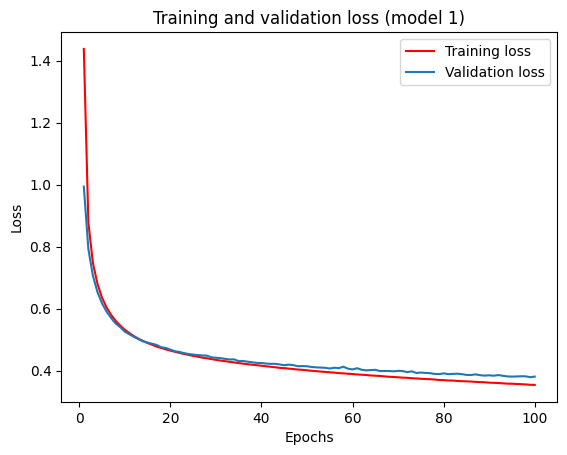

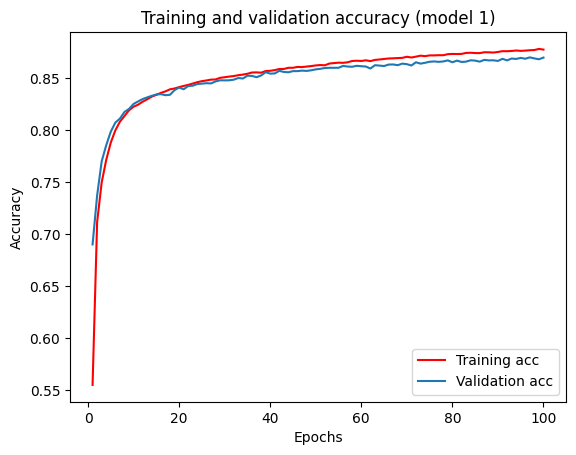

In [43]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Бачимо, що для моделі №1 в процесі навчання на тренувальному наборі ф-я втрат спадає, а точність зростає. Але точність недостатня (менше 0.91). Модель можна покращити.

#### Модель №2. Додатковий шар нейронів

В другому варіанті додамо до нейромережі ще один шар з 50 нейронів.


In [44]:
# створюємо послідовну модель
model2 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model2.add(Dense(50, input_dim=784, activation='relu'))
model2.add(Dense(50, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model2.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model2.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [45]:
# виведемо параметри моделі
print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 50)                39250     
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [46]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model2.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
250/250 [==============================] - 2s 5ms/step - loss: 1.5249 - accuracy: 0.5287 - val_loss: 1.0274 - val_accuracy: 0.6814
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.8776 - accuracy: 0.7149 - val_loss: 0.7795 - val_accuracy: 0.7381
Epoch 3/100
250/250 [==============================] - 1s 5ms/step - loss: 0.7253 - accuracy: 0.7599 - val_loss: 0.6834 - val_accuracy: 0.7780
Epoch 4/100
250/250 [==============================] - 2s 7ms/step - loss: 0.6501 - accuracy: 0.7854 - val_loss: 0.6252 - val_accuracy: 0.7910
Epoch 5/100
250/250 [==============================] - 1s 6ms/step - loss: 0.6021 - accuracy: 0.7993 - val_loss: 0.5865 - val_accuracy: 0.8034
Epoch 6/100
250/250 [==============================] - 2s 6ms/step - loss: 0.5692 - accuracy: 0.8090 - val_loss: 0.5558 - val_accuracy: 0.8124
Epoch 7/100
250/250 [==============================] - 2s 7ms/step - loss: 0.5446 - accuracy: 0.8158 - val_loss: 0.5444 - val_accuracy: 0.8142

In [47]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


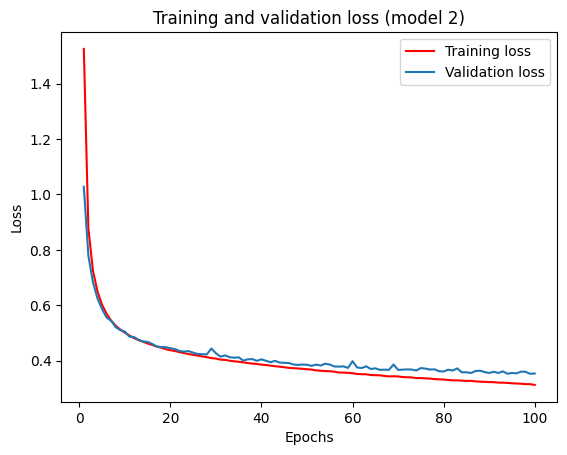

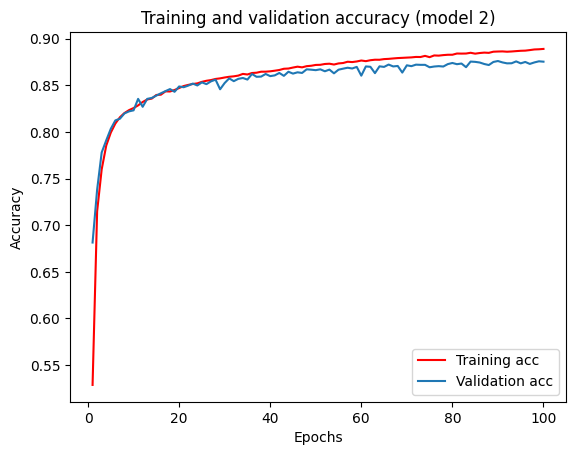

In [48]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №2 складніша за модель №1 (додано шар), точність дещо вища, але токож маємо недонавчання. В моделі №3 будемо відштовхуватися від моделі №2.

#### Модель №3. Збільшення кількості нейронів

В третьому варіанті беремо за основу модель №2. Спробуємо збільшити кількість нейронів на внутрішньому шарі до 100.


In [49]:
# створюємо послідовну модель
model3 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model3.add(Dense(50, input_dim=784, activation='relu'))
model3.add(Dense(100, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model3.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model3.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [50]:
# виведемо параметри моделі
print(model3.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                39250     
                                                                 
 dense_15 (Dense)            (None, 100)               5100      
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 45360 (177.19 KB)
Trainable params: 45360 (177.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [51]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model3.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
250/250 [==============================] - 2s 5ms/step - loss: 1.5709 - accuracy: 0.5091 - val_loss: 1.0173 - val_accuracy: 0.6652
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.8782 - accuracy: 0.6983 - val_loss: 0.7818 - val_accuracy: 0.7318
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.7338 - accuracy: 0.7439 - val_loss: 0.6922 - val_accuracy: 0.7605
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6617 - accuracy: 0.7716 - val_loss: 0.6362 - val_accuracy: 0.7859
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6147 - accuracy: 0.7890 - val_loss: 0.5968 - val_accuracy: 0.7975
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5819 - accuracy: 0.8011 - val_loss: 0.5723 - val_accuracy: 0.8049
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5567 - accuracy: 0.8088 - val_loss: 0.5451 - val_accuracy: 0.8166

In [52]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


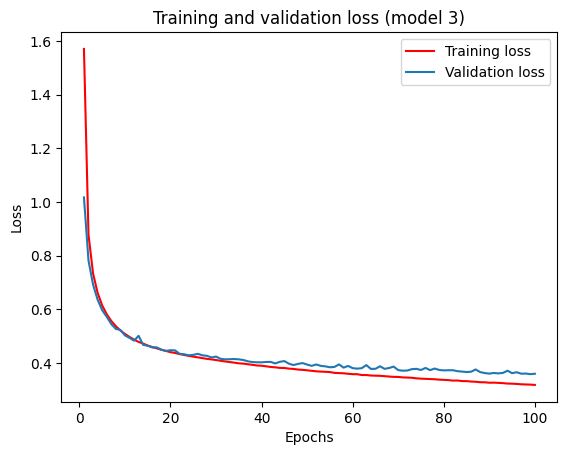

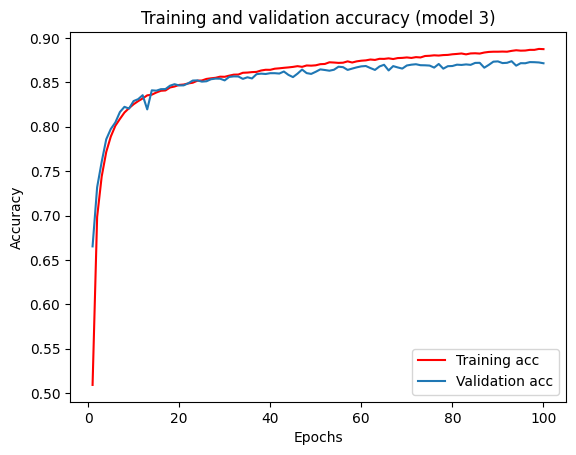

In [53]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №3 складніша за модель №2 (більше нейронів), при цьому точність не стала вище. Тому в моделі №4 будемо відштовхуватися від моделі №2.

#### Модель №4. Зміна функцій активації

В четвертому варіанті беремо за основу модель №2. Спробуємо замінити функції активації 'relu' на 'leaky_relu'.


In [54]:
# створюємо послідовну модель
model4 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model4.add(Dense(50, input_dim=784, activation='leaky_relu'))
model4.add(Dense(50, activation='leaky_relu'))
# input_dim=784 - кількість входів в кожний нейрон
model4.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model4.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [55]:
# виведемо параметри моделі
print(model4.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 50)                39250     
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dense_19 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [56]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model4.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
250/250 [==============================] - 3s 8ms/step - loss: 1.5432 - accuracy: 0.5313 - val_loss: 1.0157 - val_accuracy: 0.6980
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.8589 - accuracy: 0.7287 - val_loss: 0.7611 - val_accuracy: 0.7509
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.7058 - accuracy: 0.7654 - val_loss: 0.6705 - val_accuracy: 0.7742
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6370 - accuracy: 0.7844 - val_loss: 0.6207 - val_accuracy: 0.7887
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5955 - accuracy: 0.7967 - val_loss: 0.5859 - val_accuracy: 0.8011
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5669 - accuracy: 0.8053 - val_loss: 0.5603 - val_accuracy: 0.8096
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5455 - accuracy: 0.8125 - val_loss: 0.5409 - val_accuracy: 0.8132

In [57]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


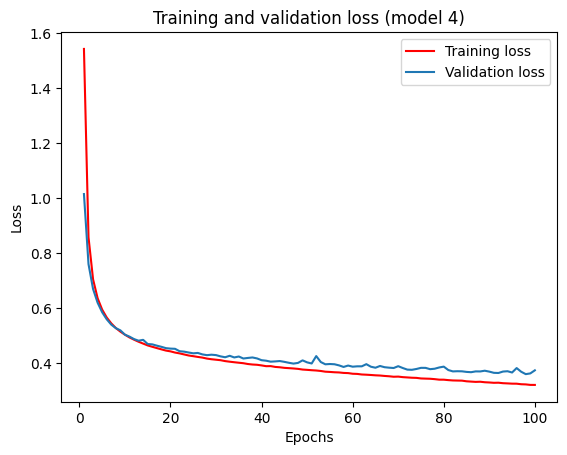

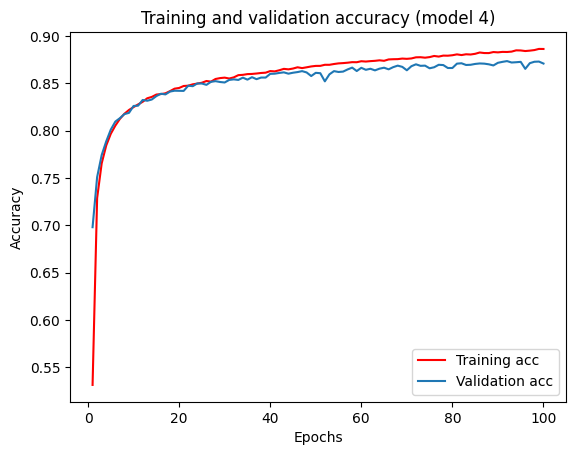

In [58]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 4)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 4)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №4 не досягає мінімальної точності.

#### Модель №5. Збільшуємо кількість епох

Використовуємо за основу модель №2. Збільшемо кількість епох до 200

In [59]:
# створюємо послідовну модель
model5 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model5.add(Dense(50, input_dim=784, activation='relu'))
model5.add(Dense(50, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model5.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model5.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [60]:
# виведемо параметри моделі
print(model5.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 50)                39250     
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [61]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model5.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=200,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/200
250/250 [==============================] - 2s 5ms/step - loss: 1.5388 - accuracy: 0.5461 - val_loss: 1.0340 - val_accuracy: 0.6873
Epoch 2/200
250/250 [==============================] - 1s 4ms/step - loss: 0.8840 - accuracy: 0.7160 - val_loss: 0.7802 - val_accuracy: 0.7384
Epoch 3/200
250/250 [==============================] - 1s 6ms/step - loss: 0.7282 - accuracy: 0.7569 - val_loss: 0.6824 - val_accuracy: 0.7754
Epoch 4/200
250/250 [==============================] - 2s 7ms/step - loss: 0.6556 - accuracy: 0.7794 - val_loss: 0.6290 - val_accuracy: 0.7905
Epoch 5/200
250/250 [==============================] - 2s 6ms/step - loss: 0.6116 - accuracy: 0.7931 - val_loss: 0.5920 - val_accuracy: 0.8046
Epoch 6/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5798 - accuracy: 0.8039 - val_loss: 0.5741 - val_accuracy: 0.8068
Epoch 7/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5565 - accuracy: 0.8111 - val_loss: 0.5604 - val_accuracy: 0.8058

In [62]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


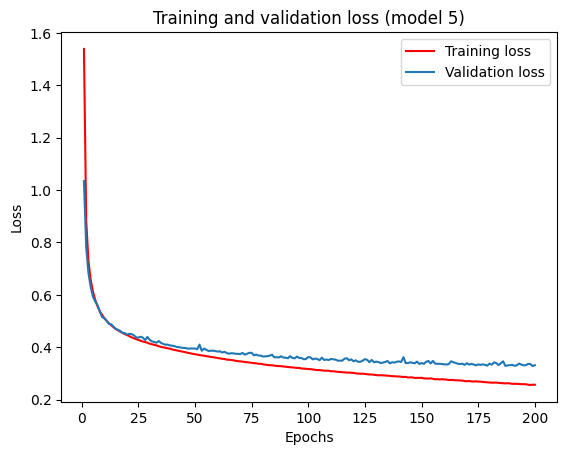

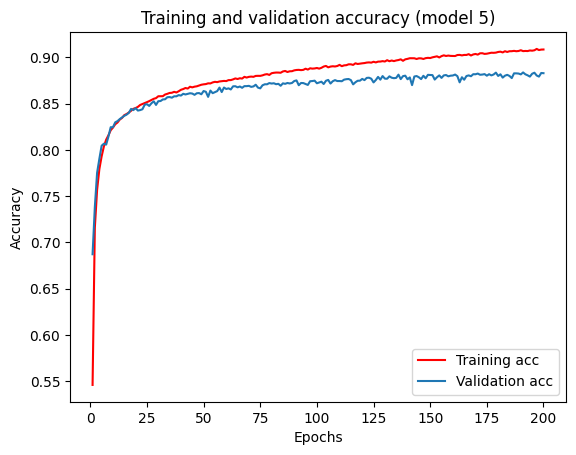

In [63]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 5)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №5 попри збільшення в два рази кількості епох, все ще недонавчена.

#### Модель №6. Зменшуємо розмір батчу

Використовуємо за основу модель №2. Зменшимо розмір батчу до 100

In [64]:
# створюємо послідовну модель
model6 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model6.add(Dense(50, input_dim=784, activation='relu'))
model6.add(Dense(50, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model6.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# компілюємо модель
model6.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [65]:
# виведемо параметри моделі
print(model6.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 50)                39250     
                                                                 
 dense_24 (Dense)            (None, 50)                2550      
                                                                 
 dense_25 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [66]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model6.fit(
    partial_x_train,
    partial_y_train,
    batch_size=100,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
500/500 [==============================] - 2s 4ms/step - loss: 1.1874 - accuracy: 0.6067 - val_loss: 0.7749 - val_accuracy: 0.7246
Epoch 2/100
500/500 [==============================] - 3s 5ms/step - loss: 0.6927 - accuracy: 0.7612 - val_loss: 0.6248 - val_accuracy: 0.7895
Epoch 3/100
500/500 [==============================] - 2s 5ms/step - loss: 0.5912 - accuracy: 0.7991 - val_loss: 0.5590 - val_accuracy: 0.8097
Epoch 4/100
500/500 [==============================] - 2s 4ms/step - loss: 0.5401 - accuracy: 0.8158 - val_loss: 0.5250 - val_accuracy: 0.8177
Epoch 5/100
500/500 [==============================] - 2s 4ms/step - loss: 0.5085 - accuracy: 0.8250 - val_loss: 0.4984 - val_accuracy: 0.8284
Epoch 6/100
500/500 [==============================] - 2s 3ms/step - loss: 0.4881 - accuracy: 0.8311 - val_loss: 0.4901 - val_accuracy: 0.8272
Epoch 7/100
500/500 [==============================] - 2s 3ms/step - loss: 0.4726 - accuracy: 0.8365 - val_loss: 0.4677 - val_accuracy: 0.8385

In [67]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


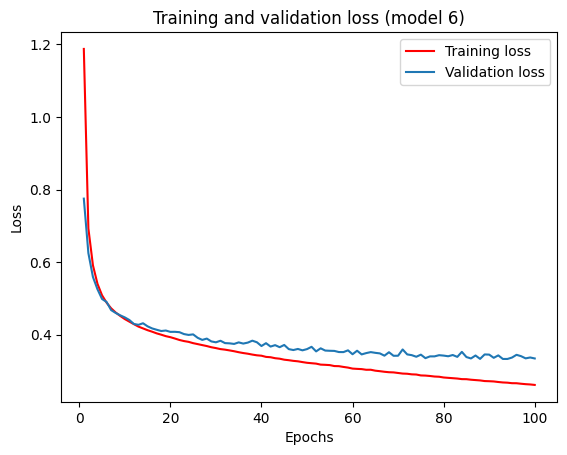

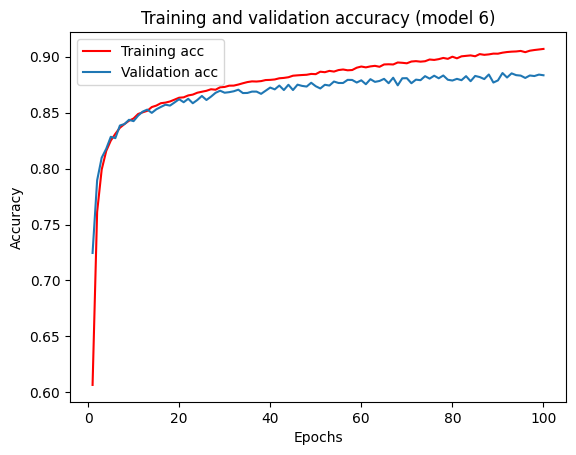

In [68]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 6)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 6)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №6 все ще недонавчена, але точність дещо збільшилася.

#### Модель №7. Вибір оптимізатора

Використовуємо за основу модель №2

In [96]:
from keras.optimizers import SGD, Adam, RMSprop

# створюємо послідовну модель
model7 = Sequential()

# додаємо повнозв'язкові шари нейромережі
model7.add(Dense(50, input_dim=784, activation='relu'))
model7.add(Dense(50, activation='relu'))
# input_dim=784 - кількість входів в кожний нейрон
model7.add(Dense(10, activation='softmax'))
# тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# Використання оптимізаторів по черзі (у висновках до пункту 7 наведено результати)
# optimizer = SGD(learning_rate=0.01, momentum=0.9)
# optimizer = Adam(learning_rate=0.001)
optimizer = RMSprop(learning_rate=0.001)

# компілюємо модель
model7.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [97]:
# виведемо параметри моделі
print(model7.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 50)                39250     
                                                                 
 dense_45 (Dense)            (None, 50)                2550      
                                                                 
 dense_46 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [98]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model7.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
250/250 [==============================] - 2s 7ms/step - loss: 0.7028 - accuracy: 0.7583 - val_loss: 0.5000 - val_accuracy: 0.8201
Epoch 2/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4729 - accuracy: 0.8321 - val_loss: 0.4556 - val_accuracy: 0.8385
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4252 - accuracy: 0.8475 - val_loss: 0.4416 - val_accuracy: 0.8370
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3932 - accuracy: 0.8582 - val_loss: 0.3870 - val_accuracy: 0.8620
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3717 - accuracy: 0.8663 - val_loss: 0.3777 - val_accuracy: 0.8620
Epoch 6/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3541 - accuracy: 0.8724 - val_loss: 0.3593 - val_accuracy: 0.8674
Epoch 7/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3414 - accuracy: 0.8751 - val_loss: 0.3499 - val_accuracy: 0.8751

In [99]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


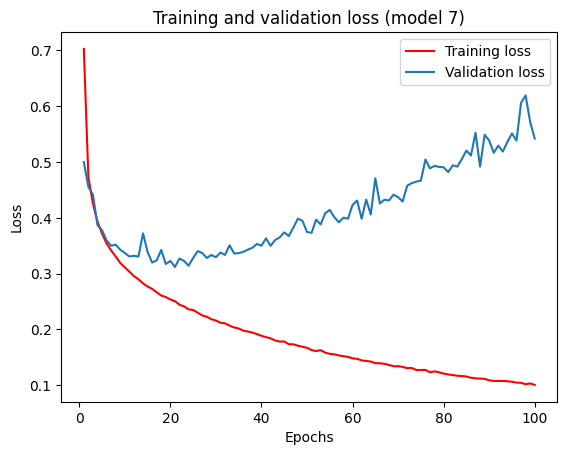

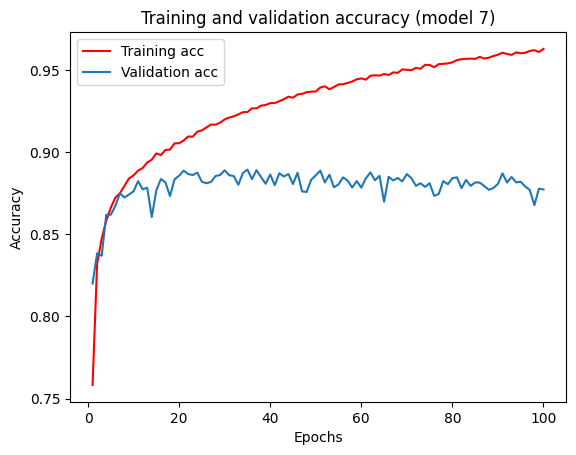

In [100]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 7)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 7)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.


Модель №7 при використанні різних оптимізаторів:
- SGD - val_accuracy: 0.8830, перенавчання;
- Adam - val_accuracy: 0.8769, перенавчання;
- RMSprop - val_accuracy: 0.8774, перенавчання.

#### Модель №8. Різні техніки регуляризації

Використовуємо за основу модель №2 та L1-регуляризацію, L2-регуляризацію і dropout.


In [111]:
from keras.layers import Dropout
from keras.regularizers import l1, l2

# створюємо послідовну модель
model8 = Sequential()

# L1-регуляризація
# додаємо повнозв'язкові шари нейромережі
# model8.add(Dense(50, input_dim=784, activation='relu', kernel_regularizer=l1(0.001)))
# model8.add(Dense(50, activation='relu', kernel_regularizer=l1(0.001)))
# # input_dim=784 - кількість входів в кожний нейрон
# model8.add(Dense(10, activation='softmax'))
# # тут input_dim не вказуємо, так як маємо повнозв'язкову модель

# L2-регуляризація
# model8.add(Dense(50, input_dim=784, activation='relu', kernel_regularizer=l2(0.001)))
# model8.add(Dense(50, activation='relu', kernel_regularizer=l2(0.001)))
# model8.add(Dense(10, activation='softmax'))

# Dropout
model8.add(Dense(50, input_dim=784, activation='relu'))
model8.add(Dropout(0.5))  # Додати dropout
model8.add(Dense(50, activation='relu'))
model8.add(Dropout(0.5))  # Додати dropout
model8.add(Dense(10, activation='softmax'))

# компілюємо модель
model8.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# loss='categorical_crossentropy' - тип ф-ї втрат, добре підходить для класифікації при кількості класів більше 2
# optimazer='SGD' - алгоритм оптимізації "стохастичний градієнтний спуск"
# metrics=['accuracy'] - метрика ефективності навчання, тут - точність

In [112]:
# виведемо параметри моделі
print(model8.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_54 (Dense)            (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_55 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Навчання моделі

In [113]:
# Відокремимо з тренувального датасету частини для відстежування ефективності в процесі навчання
# Для цієї мети тестовий набір не чипаємо, він повинен слугувати для оцінки фактичної ефективності моделі на реальних, раніше не бачених даних
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model8.fit(
    partial_x_train,
    partial_y_train,
    batch_size=200,
    epochs=100,
    validation_data=(x_val, y_val)
    )
# batch_size=200 - тренування буде виконуватися на підвибірці в 200 зображень, після чого змінюватимуться ваги і
# виконуватиметься навчання на наступній підвибірці в 200 зображень
# verbose=1 - вивід на екран прогресу навчання, якщо не вказано, то дорівнює 1 за замовчуванням

Epoch 1/100
250/250 [==============================] - 2s 5ms/step - loss: 2.1132 - accuracy: 0.2318 - val_loss: 1.6982 - val_accuracy: 0.5369
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 1.7499 - accuracy: 0.3704 - val_loss: 1.3141 - val_accuracy: 0.6295
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 1.5236 - accuracy: 0.4443 - val_loss: 1.0943 - val_accuracy: 0.6713
Epoch 4/100
250/250 [==============================] - 1s 6ms/step - loss: 1.3648 - accuracy: 0.4995 - val_loss: 0.9569 - val_accuracy: 0.7068
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 1.2546 - accuracy: 0.5427 - val_loss: 0.8661 - val_accuracy: 0.7254
Epoch 6/100
250/250 [==============================] - 1s 6ms/step - loss: 1.1681 - accuracy: 0.5710 - val_loss: 0.8108 - val_accuracy: 0.7339
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 1.1072 - accuracy: 0.5923 - val_loss: 0.7644 - val_accuracy: 0.7440

In [114]:
print(history.history.keys())  # словник, в якому знаходяться наступні ключі: loss, accuracy, val_loss, val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


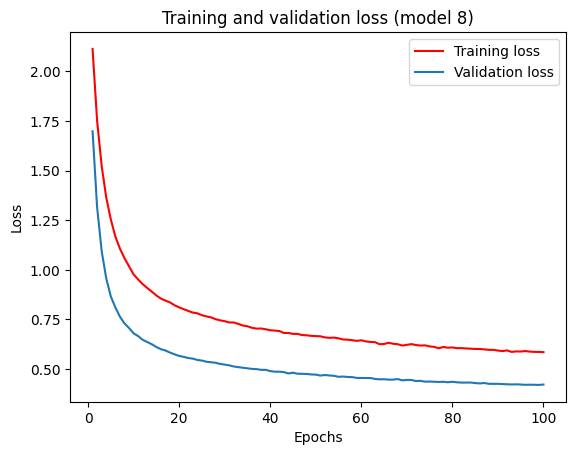

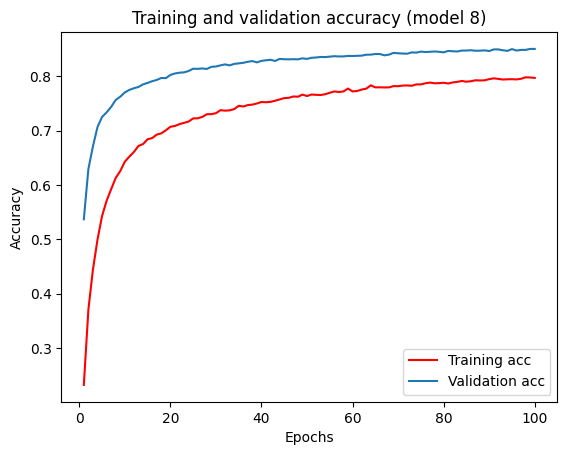

In [115]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title('Training and validation loss (model 8)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy (model 8)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Оцінювання якості роботи нейромережі.
Модель №7 при використанні різних регуляризаторів:
- L1 - val_accuracy: 0.8455;
- L2 - val_accuracy: 0.8765;
- Drop - val_accuracy: 0.8508.